## 3. Покретни просек

У овој лекцији циљ нам је да се позабавимо скакутањем вредности из године у годину које смо имали прилике да видимо на графицима у претходној лекцији, ево подсетника на акустичности и плесозовност током времена:

<img src="muzika slike/Dzez_Pop_akusticnost_razigranost.png"
     alt="Markdown Monster icon"
     width='700' />

Као што смо дискутовали претходно, на овим графицима видимо да постоје неки јаснији трендови пада и раста (када се вредности по у оси драматичније мењају), али и доста мањих варијација, поготово међу узастопним годинама (што чини да наше линије имају овај цик-цак облик). 
Поменути цик-цак облик нам је још уочљивији када се користимо визуализацијама које спајају измерене вредности, али га једнако можемо приметити и када ове податке представљамо стубичастим дијаграмима и наш циљ у наставку је да решимо овај *проблем*. Током протекле две године сте имали прилику да често виђате податке који имају тако честе варијације међу узастопним подацима, а онда сте можда видели и једно решење:

<img src="muzika slike/kovid_slika_google.jpg"
     width='400' />
*Извор слике: гугл претрага броја ковид случајева у србији, принтскрин.*

На овим графицима броја ковид случајева, сви смо имали прилике да видимо да се број случајева из дана у дан мења на необичан начин. Постоје периоди драматичног раста (када креће нови талас) и пада (када ситуација креће да се стабилизује и долази до смањења броја нових случајева), али и у оквиру тих периода бројеви из дана у дан су некад већи а некад мањи од претходног дана. Један узрок у овом ковид примеру је на пример различит рад лабораторија које се баве тестирањем узорака, па тако број позитивних варира више као последица дана у недељи и радних навика а не због неких специфичности ширења вируса. Начин на који су те мале дневне варијације решене и на претходном графику је цртање седмодневног просека (то је тамно плава линија, преко дневних вредности забележених светло плавим стубичастим дијаграмом). Ово *усредњавање* нам помаже да се поменуте варијације испеглају и тиме лакше уочавамо трендове раста и пада, односно у овом примеру лакше примећујемо периоде и трајање различитих таласа ковид пандемије.

У наставку ћемо припремити и објаснити функцију која рачуна покретни просек за податке за временски зависне податке које смо гледали у претходној лекцији (нпр. број песама по годинама, просечна акустичност по годинама и тако даље). Ова лекција није неопходна за схватање наредних, али вам може бити од користи уколико се у будућности будете сусретали са графицима попут поменутог са ковид подацима или будете желели да своје податке анализирате уз помоћ покретног просека и тиме лакше уочите временске трендове.

In [1]:
import pandas as pd # učitavanje biblioteke za manipulaciju tabelama i nazivanje je njenom standardnom skraćenicom "pd"
import matplotlib.pyplot as plt # ucitavanje bibliotke za crtanje i nazivanje je njenom standardnom skracenicom "plt"
import seaborn as sns # ucitavanje biblioteke za crtanje

podaci = pd.read_csv('muzika podaci/music_data.csv') # učitavanje prethodno pripremljenog skupa podataka i cuvanje u promenljivoj podaci

Издвојићемо као у претходној лекцији песме једног жанра у посебну табелу, а затим избројати песме тог жанра из године у годину:

In [2]:
popmuzika = podaci[podaci.genre=='pop'].copy() # selektujemo samo podatke za pesme pop žanra
pop_tokom_vremena = popmuzika['release_date'].value_counts() # brojimo pesme pop žanra po godinama
pop_tokom_vremena = pop_tokom_vremena.sort_index()

Овакве податке смо у претходној лекцији цртали као тачкасте, линијске и стубичасте дијаграме, овде ћемо поновити стубичасти дијаграм пре него што му додамо линију покретног просека:

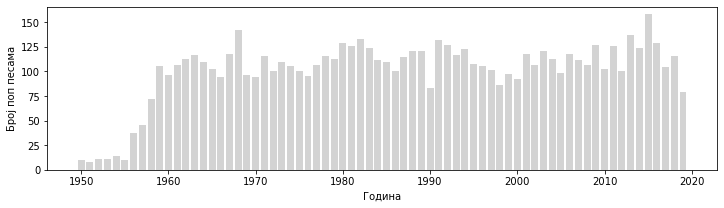

In [3]:
plt.figure(figsize=(12,3)) # dimenzije prostora na kome crtamo, odabrali smo ovaj izduzeni pravougaonik zato sto se stubici tako lakse vide, probajte bez ove komande
plt.bar(pop_tokom_vremena.index,pop_tokom_vremena,color='lightgrey') # stubicasti dijagram sive boje
plt.xlabel('Година') # ime x ose
plt.ylabel('Број поп песама') # ime y ose
plt.show() # prkaz grafika

Главна идеја иза покретног просека је да уместо вредности које имате из године у годину (или у примеру са ковидом из дана у дан) приказујете вредности које су просек последњих пар вредности (у примеру са ковидом последњих 7 дана). Да бисмо припремили те податке, направићемо 2 листе, једну у којој ћемо чувати временске одреднице, а једну у којој ћемо чувати нове просечне податке. 

Ако хоћемо да приказујемо средње вредности последњих на пример 5 година, не можемо ту вредност израчунати за прве 4 године, зато ће листа година у којима ћемо срачунати просек претходних 5, почињати од пете године, овако правимо ту листу:

In [4]:
vremenski_interval = 5 # interval tokom koga racunamo prosek
prva_godina = min(pop_tokom_vremena.index)+vremenski_interval-1 # prva godina za koju mozemo da sracunamo petogodisnji prosek, mora biti bar 5 godina veca od prve godine koju imamo u podaciam
poslednja_godina = max(pop_tokom_vremena.index) # poslednja godina je najveca vrednost podataka o godinama u podacima
vreme = [t for t in range(prva_godina,poslednja_godina+1)] # lista godina pocev od prve godine do poslednje godine koje smo identifikovali kao bitne
#vreme = [*range(prva_godina,poslednja_godina+1)] # i ovo radi isto sto i prethodno, ostavljam kao ideju za skracivanje koda
print(vreme[:5])# prikaz prvih pet godina za proveru

[1954, 1955, 1956, 1957, 1958]


У претходном блоку кода, једна новина крије се у овој линији `vreme = [t for t in range(prva_godina,poslednja_godina+1)]`. Прочитаћемо значење ове линије: ова листа (зато што су употребљене угласте заграде) садржи `t` за свако `t` које је у опсегу (`range`) између прве и последње године које смо идентификовали као битне. Ово је једна јако пајтон специфична команда, уместо да направите `for` петљу и попуњавате листу на традиционалан начин:
```
vreme = [] # prazna lista
for t in range(prva_godina,poslednja_godina+1): # za svako t u definisanom opsegu 
    vreme.append(t) # dodaj t u listu
```
док смо овде одмах попунили листу на тај начин, више о погодностима листа можете прочитати у [документацији](https://docs.python.org/3/tutorial/datastructures.html) или кроз овај [курс на петљи](https://petlja.org/biblioteka/r/lekcije/TxtProgInPythonSrLat/02_console-toctree) где се можете подсетити и петљи, опсега и сличних пајтон специфичности.

Са петљом у наставку проћи ћемо кроз све године из листе `vreme` и за сваку годину ћемо срачунати просечан број поп песама издатих у претходних пар година (контролисано променљивом `vremenski_interval` чија је вредност сада 5, али ако хоћемо да променимо број година на којима рачунамо просек можемо то променити):

In [5]:
proseci = [] # prazna lista u koju cemo dodavati proseke
for god in vreme: # za svaku godinu u okviru pripremljene liste vreme
    # kroz promenljivu uslov definisemo za koje godine hocemo da usrednjimo podatke - sve godine u poslednjem vremenskom intervalu 
    uslov = (pop_tokom_vremena.index>god-vremenski_interval)&(pop_tokom_vremena.index<=god)
    # izdvajamo podatke koji odgovaraju uslovu i cuvamo ih u promenljivoj prosek:
    podskup = pop_tokom_vremena[uslov]
    # listu proseka dodajemo prosecnu vrednost podskupa podataka
    proseci.append(podskup.mean())
print(proseci[:5])

[10.8, 10.8, 16.6, 23.6, 35.8]


Листа `proseci` сада садржи просечне бројеве поп песама претходних 5 година, и можемо је као линију доцртати на претходно цртани стубичасти дијаграм:

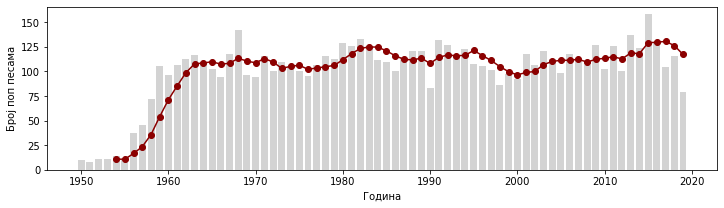

In [6]:
plt.figure(figsize=(12,3)) # dimenzije prostora na kome crtamo, odabrali smo ovaj izduzeni pravougaonik zato sto se stubici tako lakse vide, probajte bez ove komande
plt.bar(pop_tokom_vremena.index,pop_tokom_vremena,color='lightgrey') # stubicasti dijagram sive boje
plt.plot(vreme,proseci,color='darkred',marker='o') # novoizdacunati pokretni prosek crtamo u tamno crvenoj boji
plt.xlabel('Година') # ime x ose
plt.ylabel('Број поп песама') # ime y ose
plt.show() # prkaz grafika

Тачкицама дуж линије истакли смо израчунате вредности да бисмо лако могли за сваку годину да упоредимо просек претходних пет година (тамно црвени кружић) и број песама издатих те године (висина стубића).

Очекивано, петогодишњи просек не можемо срачунати првих 4 година, стога линија померајућег просека на графику креће касније, тј. први пут када је могуће израчунати просек првих 5 година. Видимо да је крива са петогодишњим просецима глаткија, тачније скоковите промене које јасно примећујемо на стубичастом дијаграму су поравнате. 

Обратите пажњу на почетак тамно црвене линије, деценија раста броја песама (од половине педесетих до половине шездесетих година прошлог века) је сада једна глатка увек растућа линија. Примећујемо у овом делу да су вредности на тамно црвеној линији увек ниже од висина стубића, то је последица усредњавања са претходне 4 вредности - када постоји пораст у вредности, тај пораст се на овако усредњеној линији мање види. Баш та особина нам помаже да се неке краткотрајне промене (скокови и падови) ублаже, да би се јасније видели само неки трендови који се понављају дужи низ година (као на пример и раст крајем седамдесетих година, или пад крајем деведесетих). Обратите пажњу на пример и на године непосредно пре седамдесетих када судећи по стубичастом дијаграму постоји скок у годишњој продукцији поп песама, али усредњена линија га не види зато сто се тај раст није понављао у наредним годинама. Слично је и са падовима, нпр. 1990. године иако су вредносно и поменути раст и пад, промене од по двадесетак песама и  упоредиви са растом који се бележи крајем педесетих, чињеница да се промене нису понављале учиниле се да се ова одступања заравне и да можемо лако да сагледамо само дугорочније трендове.

Додатна последица вишегодишњег усредњавања је и кашњење у постигнутим вредностима - видите нпр. годину у којој стубичасти дијаграм први пут достигне вредности блиске 100, и када тамно црвена линија достигне исто. 

Покретни просек (на енг. moving average, rolling average) се често користи да се одстране брзе промене у подацима и да се лакше сагледа нека доминантија, односно дужа правилност. Поред ковид примера са почетка, типични примери коришћења покретног просека су у финансијама када се посматрају промене у ценама током времена.

Сада ћемо рачунање покретног просека применити и на податке о музичким карактеристикама. Урадићемо то у оквиру функције коју после лако можемо примењивати на различите жанрове и музичке карактеристике. Резултат функције може бити листа просечних вредности које ћемо накнадно нацртати (као горе), али смо се ми одлучили да функција одмах и црта израчунато.

In [7]:
podaci.columns

Index(['release_date', 'artist_name', 'track_name', 'genre', 'lyrics',
       'acousticness', 'danceability', 'instrumentalness', 'loudness',
       'valence', 'energy', 'muzicka_dekada'],
      dtype='object')

In [8]:
def grafik_pokretnog_proseka(podaci, zanr, muz_karakteristika, vremenski_interval, boja):
    """
    Ova funkcija za odabrani zanr i muzicku karakteristiku crta grafik promene karakteristike kroz vreme
    ali se usrednjavanje ne vrsi na godisnjem vec na visegodisnjem nivou (definisano parametrom vremenski_interval).
    
    podaci - skup podataka koji sadrzi pesme razlicitih zanrova i za svaku ima vrednosti muzickih karakteristika (akusticnost, glasnost,itd.)
    zanr - string koji oznacava muzicki zanr koji hocemo da selektujemo - moze biti 'pop', 'rock' itd
    muz_karakteristika - string koji oznacava karakteristiku koju usrednjavamo i crtamo, mora da odgovara imenu kolone u tabeli podaci(moze biti 'acousticness', 'danceability'...)
    vremenski_interval je broj godina (int), za 1 radi isto sto i groupby('release_date').mean(), za 10 crta desetogodisnji prosek
    boja - string sa imenom boje (npr.'grey') ili heks kodom ('#000000') kojom crtamo liniju izracunatog proseka
    """

    zanr_cirilicom = {'pop':'поп','country':'кантри','blues':'блуз','jazz':'џез','reggae':'реге','rock':'рок','hip hop':'хип хоп'}
    muz_cirilicom = {'acousticness':'Акустичност','instrumentalness':'Инструменталност',
                     'danceability':'Плесозовност','loudness':'Гласност','valence':'Позитивност',
                     'energy':'Енергичност'}
    
    podaci_podskup = podaci[podaci.genre==zanr][['release_date',muz_karakteristika]] # deo skupa podataka koji odgovoara odabranom zanru i muzickoj karakteristici
    
    prva_godina = min(podaci_podskup.release_date)+vremenski_interval-1 # prva godina za koju mozemo da sracunamo petogodisnji prosek, mora biti bar 5 godina veca od prve godine koju imamo u podaciam
    poslednja_godina = max(podaci_podskup.release_date) # poslednja godina je najveca vrednost podataka o godinama u podacima

    vreme = [t for t in range(prva_godina,poslednja_godina+1)] # lista godina od min za koju cemo sracunati prosek do maksimalne za zanr koji posmatramo
    prosek = [] # lista u kojoj cemo sacuvati prosecne podatke u toku odabranog vremenskog intervala
    for t in vreme: # za svaku godinu iz liste
        uslov = ((podaci_podskup.release_date)>=t-vremenski_interval)&((podaci_podskup.release_date)<t)
        podskup_t = podaci_podskup[uslov][muz_karakteristika] # izdvajamo deo podataka koji odgovara prethodnim godinama u okviru posmatranog prozora
        prosek.append(podskup_t.mean()) # racunamo prosek i dodajemo u listu
    plt.plot(vreme, prosek,color=boja,label=zanr_cirilicom[zanr]+', '+str(vremenski_interval)+'-годишњи просек') # crtamo grafik
    plt.xlabel('Година')
    plt.ylabel(muz_cirilicom[muz_karakteristika].capitalize())
    #return time,mean_feature # alternativno, ova funkcija bi mogla da vraca sracunate vrednosti a da na drugom mestu crtamo grafik

Можемо да испробамо рад функције на поп музици и њеној акустичности коју смо претходно анализирали:

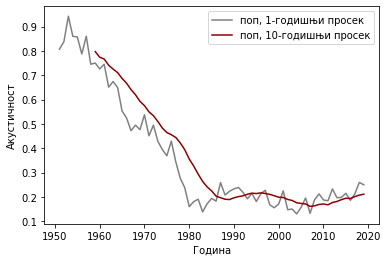

In [11]:
grafik_pokretnog_proseka(podaci,'pop','acousticness',1,'grey') # isprobavamo kreiranu funkciju za pop zanr i akusticnost, koristeci jednogodisnje usrednjavanje
#grafik_pokretnog_proseka(podaci,'pop','acousticness',5,'grey')
grafik_pokretnog_proseka(podaci,'pop','acousticness',10,'darkred') # desetogodisnje usrednjavanje
plt.legend()
plt.show()

Да тестирамо креирану функцију, овде смо је испробали са претходно цртаним поп жанром и акустичношћу (видите прву слику ове лекције). Нацртали смо једногодишњи просек (који смо у претходној лекцији цртали уз помоћ `groupby` функције а који је сада специјални случај нове функције за вредност временског интервала од једне године) сивом бојом, и за поређење десетогодишњи просек тамном црвеном бојом. Као и у случају броја поп песама, видимо да је и покретни просек акустичности поп песама глаткија линија на којој лакше можемо да видимо да је до осамдесетих година акустичност била у паду, након чега је прилично стабилна, односно електроника доминира поп музиком од тада.

Сада, када имамо функцију којом једноставно цртамо глатку линију промена музичког атрибута кроз време, хајде да пробамо да на једном графику сагледамо све жанрове које имамо у скупу података и упоредимо их по вредности енергичности.

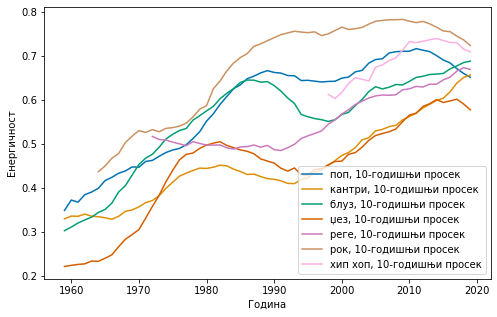

In [10]:
plt.figure(figsize=(8,5)) # definišemo prostor za crtanje, malo veći nego inače da bismo lakše pročitali legendu grafika
i=0 # brojač koji nam pomaže da iteriramo kroz paletu boja
for genre in podaci.genre.unique(): # za sve žanrove u listi jedinstvenih žanrova u našem skupu podataka
    grafik_pokretnog_proseka(podaci, genre,'energy',10, # pozivamo našu funkciju za crtanje usrednjene vrednosti energičnosti pesama po žanrovima za prozor od 10 godina
                 sns.color_palette("colorblind")[i]) # za parametar boje koristimo listu boja palete sa kojom imamo najveće šanse da čitaoci razlikuju boje linija
    i+=1 # uvećavamo brojač da iskoristimo sledeću boju za sledeći žanr

plt.legend() # legenda na grafiku

plt.show()

Примећујемо да је енергичност песама сада већа од енергичности песама током шездесетих и седамдесетих, без обзира на жанр. Видимо такође да је енергичност неких жанрова увек већа од других (упоредите на пример џез и блуз). Покретни просек нам је помогао да видимо на једном месту све жанрове и да тако лакше сагледамо да је код неких жанрова током деведесетих дошло до пада у енергичности, али је након тога у свим жанровима енергичност у порасту. Видите у наставку на пример график који можете добити користећи `sns.lineplot` функцију без покретног просека: 

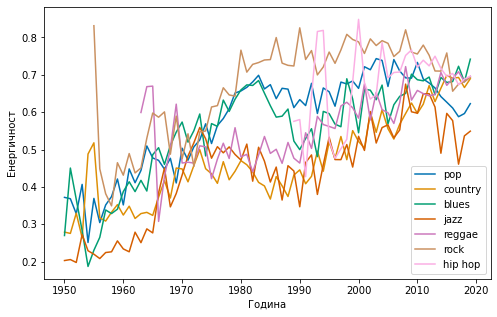

In [11]:
plt.figure(figsize=(8,5)) # definišemo prostor za crtanje, malo veći nego inače da bismo lakše pročitali legendu grafika
sns.lineplot(data = podaci, # izbor podataka koje crtamo
             x = 'release_date',y='energy', # izbor kolona koje se nalaze na x i y osi
             hue='genre', # biramo da linije budu obojene po zanrovima
             palette="colorblind", # definisemo paletu boja za koriscenje, kao u prethodnoj svesci 
             ci=None) # ovim parametrom definisemo da se na grafiku pojave samo izracunate prosecne vrednosti, vise o tome u nastavku
plt.ylabel('Енергичност') # ime u ose, h smo definisali u funkciji
plt.xlabel('Година') # ime u ose, h smo definisali u funkciji
plt.legend() # legenda na grafiku

plt.show()

Без пкретног пресека сви жанрови имају цик цак линије и јако је тешко испратити шта се дешава у највећем делу података које анализирамо - видимо да је рок осамдесетих најенергичнији, али не можемо тако лако наћи где је рок пре тога, слично је и са осталим жанровима. Интересантно је такође да се у графику са покретним просеком не види да је енергичност рок музике и на самом почетку била јако висока, хајде да видимо о чему се ради:

In [12]:
rok_podaci = podaci[(podaci.genre=='rock')] # izdvajamo rok podatke i cuvamo ih u posebnu promenljivu
min_god = min(rok_podaci.release_date) # izdvajamo prvu godinu za koju imamo rok pesme
rok_podaci[rok_podaci.release_date==min_god] # prikazujemo pesme koje su izdate u prvoj godini koju imamo u podacima

,release_date,artist_name,track_name,genre,lyrics,acousticness,danceability,instrumentalness,loudness,valence,energy,muzicka_dekada
23434,1955,ronnie self,big fool,rock,fool fool tell love walk fool fool drivin craz...,0.764056,0.666414,0.000007,0.756865,0.956719,0.720712,1950s
23435,1955,ronnie self,bop-a-lena,rock,gogalgo bopalena bopalena bopalena bopalena ye...,0.604417,0.587350,0.006346,0.852934,0.968054,0.941940,1950s


Обабезно послушајте ове песме ([овде](https://www.youtube.com/watch?v=7BLU0pUYWMU) и [овде](https://www.youtube.com/watch?v=4Q7jPi0gZEU)) и сами се уверите да ли су оцене о њиховим музичким карактеристикама онакве каквим их параметри приказују.

Али и поред индивидуалне оцене, оно што можемо да приметимо је да за 1955. годину постоје само 2 рок песме истог аутора, са врло високом вредношћу параметра енергичности, што је и информација коју смо приметили на цик-цак дијаграму без покретног пресека. Хајде да видимо како се број рок песама до краја педесетих мењао:

In [13]:
rok_podaci[(rok_podaci.muzicka_dekada=='1950s')].release_date.value_counts()

1958    31
1957    28
1959    28
1956    18
1955     2
Name: release_date, dtype: int64

Видимо да је свих осталих година било више од 2 песме, стога када смо кренули да примењујемо пкретни пресек, ове две изузетно енергичне песме су изгубиле на значају и њихово одступање више није видљиво на графику који приказује петогодишње просеке. Ово је још једна предност покретног пресека - специфичне године са мало података који одступају не могу тако драстично променити изглед графикона.

Вратимо се сада графикону покретног просека енергичности за различите жанрове. Иако смо видели пуно интересантних информација на овом графику, он и даље није претерано привлачан за посматрање ни лак за комуникацију кључних порука зато што има пуно линија и пуно боја. Боја је користан алат за издвајање различитих категорија података, али постоји лимит на лако разазнавање и праћење броја, са 7 жанрова и толико боја отежавамо читаоцу схватање порука. Када се на линијском дијаграму види прегршт линија различитих боја, то се популарно заове и шпагети дијаграм, енг. *spagetti plot*, потражите те лоше примере да видите зашто нам је поребно да их превазилазимо, иако 7 шарених линија још увек није пуно страшно.

Један начин да превазиђемо овај проблем је поређење мањег броја жанрова као што смо радили на првом приказаном графику у овој лекцији. Други начин је појединачан график за сваку од линија, као што смо посматрали број песама за сваки жанр. Међутим, пажљива употреба боја може бити још једно решење:

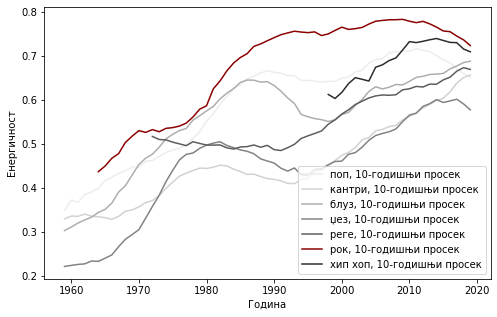

In [14]:
plt.figure(figsize=(8,5))
i=0
for genre in podaci.genre.unique():
    if genre == 'rock':
        grafik_pokretnog_proseka(podaci,genre,'energy',10,'darkred')
    else:
        grafik_pokretnog_proseka(podaci,genre,'energy',10,sns.color_palette('Greys')[i])
        i+=1
plt.legend()
plt.show()

Нијансе сиве уз једну линију коју желите да истакнете често могу бити далеко ефектније решење од коришћења десет различитих боја. Овде на пример смо усмерили пажњу читалаца на тамно црвену боју која представља енергичност рок жанра, док остале линије служе да искомуницирају контекст, овде на пример, да је енергичност свих других жанрова мања и не бавимо се превише тиме колико и у ком периоду.

Видели смо како да израчунамо покретни просек и како нам то помаже да на истом графику сагледамо више жанрова и промена које су се у њима дешавале током година што нам је било тешко да сагледамо на цик-цак графицима које смо претходно добијали. Приметили смо да је енергичност у порасту за већину жанрова, а остављамо вама да истражите плесозовност и гласност (да ли очекујете да неки жанр буде више гласан, а више за плес?). Иако смо уз помоћ просечних вредности сада лако могли да уочимо неке промене које су се дешавале током периода који посматрамо, ми смо сводили цео један жанр са пуно различитих извођача и песама на једну вредност - просечну. Питање којим ћемо се позабавити у наредној лекцији тиче се управо ове теме, да ли просек садржи довољно информација, тј. да ли је пуно песама једног жанра слично просечним вредностима или не?

<div class="alert alert-block alert-info"><img src="muzika slike/zad.png" align="left"/>Истражити како се плесозовност и гласност мењала по жанровима кроз време. Анализирајте промене на графицима које можете добити примењујући функцију `sns.lineplot()` и функцију `grafik_pokretnog_proseka`.</div> 

In [15]:
# # resenje

# plt.figure(figsize=(8,5))
# i=0
# for genre in podaci.genre.unique():
#     if genre == 'pop':
#         grafik_pokretnog_proseka(podaci,genre,'danceability',10,'darkred')
#     else:
#         grafik_pokretnog_proseka(podaci,genre,'danceability',10,sns.color_palette('Greys')[i])
#         i+=1
        
# plt.ylim([0,1])
# plt.legend()
# plt.show()

In [16]:
# # resenje

# plt.figure(figsize=(8,5))
# i=0
# for genre in podaci.genre.unique():
#     if genre == 'country':
#         grafik_pokretnog_proseka(podaci,genre,'loudness',10,'darkred')
#     else:
#         grafik_pokretnog_proseka(podaci,genre,'loudness',10,sns.color_palette('Greys')[i])
#         i+=1
        
    
# plt.legend()
# plt.show()